В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [203]:
cars_df = pd.read_csv("https://docs.google.com/spreadsheets/d/1FaJ8ImYx8mhq90TxE44gVvVbMt38ZpDx_AeoNnzDYqg/gviz/tq?tqx=out:csv&sheet=Sheet1")
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [204]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [205]:
cat_cars_df = cars_df.select_dtypes(include=['object']).columns
unique_cat_cars_df = cars_df[cat_cars_df].nunique()
print("Кількість унікальних значень для кожної категоріальної колонки:")
print(unique_cat_cars_df)

Кількість унікальних значень для кожної категоріальної колонки:
Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64


В поточному наборі даних є всього 100 рядків записів, незаповнені дані відсутні.
В наборі є 13 колонок, одна з яких є ID поточного запису, тому ми будемо розглядати лише 12, з яких 7 є числовими, а 5 категоріальних:
- 2 колонки є бінарні (Fuel_Type, Transmission)
- 1 колонка категоріальні змінні якої можена замінити числовими оскільки числову кількість власників в колонці виражено словами (Owner_Type)
- 2 мультикатегоріальних (Brand 11 значень, Model 58 значень)

Цільовою змінною у нашому дата сеті буде Price

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [206]:
cars_df_copy = cars_df.copy()
inputs = cars_df_copy.drop(columns=['Car_ID', 'Price'])
target = cars_df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [207]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [208]:
# count fuel_type and transmission values
fuel_type_counts = X_train['Fuel_Type'].value_counts()
transmission_counts = X_train['Transmission'].value_counts()
print("Кількість унікальних значень для Fuel_Type:")
print(fuel_type_counts)
print("Кількість унікальних значень для Transmission:")
print(transmission_counts)

Кількість унікальних значень для Fuel_Type:
Fuel_Type
Diesel    40
Petrol    40
Name: count, dtype: int64
Кількість унікальних значень для Transmission:
Transmission
Automatic    48
Manual       32
Name: count, dtype: int64


In [209]:
def replace_categorical_with_codes(df: pd.DataFrame, codes: dict, column_name: str):
    """
    Replace categorical values in a DataFrame column with corresponding codes.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    for category, code in codes.items():
        df.loc[df[column_name] == category, column_name + '_Code'] = code

In [210]:
fuel_type_code = {'Petrol': 0, 'Diesel': 1}
transmission_code = {'Manual': 0, 'Automatic': 1}
replace_categorical_with_codes(X_train, fuel_type_code, 'Fuel_Type')
replace_categorical_with_codes(X_train, transmission_code, 'Transmission')
replace_categorical_with_codes(X_test, fuel_type_code, 'Fuel_Type')
replace_categorical_with_codes(X_test, transmission_code, 'Transmission')


In [211]:
enc_brand = preprocessing.OneHotEncoder()
brand_train = enc_brand.fit_transform(X_train[['Brand']]).toarray()
brand_test = enc_brand.transform(X_test[['Brand']]).toarray()
brand_columns = enc_brand.categories_[0].tolist()
X_train[brand_columns] = brand_train
X_test[brand_columns] = brand_test

In [212]:
sedans = [
    'Corolla', 'Civic', 'Mustang', 'Sonata', 'Polo', 'A4', 'A6', 'A3',
    '3 Series', '5 Series', '7 Series', 'C-Class', 'E-Class', 'Verna',
    'City', 'Elantra', 'Yaris', 'Camry', 'Vento', 'Passat', 'Aspire'
]
hatchbacks = [
    'Altroz', 'Swift', 'Tiago', 'Figo', 'Tigor', 'Santro', 'WR-V', 'Ameo'
]
suvs = [
    'Creta', 'Harrier', 'Ertiga', 'Nexon', 'Scorpio', 'Endeavour',
    'Fortuner', 'Safari', 'Vitara', 'BR-V', 'S-Cross', 'T-Roc',
    'Q3', 'Q7', 'X1', 'X3', 'X5', 'GLA', 'GLC', 'GLE',
    'EcoSport', 'XUV300', 'Venue', 'Ranger', 'Innova', 'Innova Crysta'
]
wagons = [
    'Innova', 'Innova Crysta', 'Ertiga', 'Safari', 'S-Cross'
]
coupes = ['Mustang', 'A5']
pickups = ['Ranger', 'Thar']

def map_model_to_body(model):
    if model in sedans:
        return 'Sedan'
    elif model in hatchbacks:
        return 'Hatchback'
    elif model in suvs:
        return 'SUV'
    elif model in wagons:
        return 'Wagon'
    elif model in coupes:
        return 'Coupe'
    elif model in pickups:
        return 'Pickup'
    else:
        return 'Other'

X_test['BodyType'] = X_test['Model'].apply(map_model_to_body)
X_train['BodyType'] = X_train['Model'].apply(map_model_to_body)

enc_model = preprocessing.OneHotEncoder()
model_train = enc_model.fit_transform(X_train[['BodyType']]).toarray()
model_test = enc_model.transform(X_test[['BodyType']]).toarray()
model_columns = enc_model.categories_[0].tolist()
X_train[model_columns] = model_train
X_test[model_columns] = model_test


Моделі автомобілів були згруповані за типом кузова оскільки в загальному ціни відрізняються на автомобілі за типом кузова і можуть  групуватись за цією ознакою

Очікуваний результат після трансформацій:

In [213]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,BodyType,Coupe,Hatchback,Other,Pickup,SUV,Sedan
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Coupe,1.0,0.0,0.0,0.0,0.0,0.0
88,Ford,Mustang,2019,22000,Petrol,Automatic,First,13,2261,396,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,0.0,0.0,0.0,1.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,0.0,0.0,0.0,1.0
42,Tata,Tigor,2018,42000,Diesel,Manual,First,24,1047,69,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Hatchback,0.0,1.0,0.0,0.0,0.0,0.0
69,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,126,5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,BodyType,Coupe,Hatchback,Other,Pickup,SUV,Sedan
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SUV,0.0,0.0,0.0,0.0,1.0,0.0
53,Mahindra,XUV300,2019,26000,Diesel,Manual,Second,20,1497,115,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,SUV,0.0,0.0,0.0,0.0,1.0,0.0
70,Tata,Safari,2018,42000,Diesel,Manual,First,14,1956,150,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,SUV,0.0,0.0,0.0,0.0,1.0,0.0
45,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SUV,0.0,0.0,0.0,0.0,1.0,0.0
44,Honda,BR-V,2018,28000,Diesel,Manual,First,21,1498,98,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUV,0.0,0.0,0.0,0.0,1.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [214]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

df_train_cars = pd.concat([X_train, y_train], axis=1)
corr_matrix = df_train_cars.corr()
print("Correlation matrix of numeric features in training set:")
display(corr_matrix)

Correlation matrix of numeric features in training set:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_Codes,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Coupe,Hatchback,Other,Pickup,SUV,Sedan,Price
Year,1.000000,-0.738435,0.221176,-0.333860,-0.211394,-0.258420,-0.059632,-1.888574e-01,-0.184185,-3.251818e-01,0.201719,-0.071381,-0.070435,0.026920,0.274403,0.319667,-0.055958,0.223831,-0.307262,-0.084474,-0.043682,0.355543,-0.030692,0.359536,-0.149631,-0.205707,-0.222883
Kilometers_Driven,-0.738435,1.000000,-0.118523,0.107977,-0.069627,0.461516,0.073593,2.814262e-01,-0.035072,1.578741e-01,-0.275045,-0.057103,0.156801,-0.002752,-0.144758,-0.234819,-0.101708,0.031599,0.427086,0.018216,-0.001423,-0.227734,0.052327,-0.342963,0.241051,0.021029,-0.044597
Mileage,0.221176,-0.118523,1.000000,-0.679660,-0.650381,-0.212652,0.087325,-7.682314e-03,-0.385764,-1.393748e-01,-0.098466,-0.267135,0.452253,0.159048,-0.045824,0.166619,-0.169011,0.253516,-0.235173,0.077485,0.004921,0.583051,0.003457,-0.093492,-0.346552,-0.048741,-0.587534
Engine,-0.333860,0.107977,-0.679660,1.000000,0.782230,0.189329,-0.280210,2.786874e-01,0.408244,4.736107e-02,0.283833,0.131277,-0.156884,-0.288026,0.032904,-0.195651,0.110306,-0.278002,0.359137,-0.142925,0.012482,-0.445214,0.008770,0.065151,0.204091,0.093583,0.686878
Power,-0.211394,-0.069627,-0.650381,0.782230,1.000000,-0.115078,-0.291088,-7.953197e-04,0.575477,1.620248e-01,0.400648,0.216855,-0.189292,-0.280386,-0.102943,-0.219520,0.209381,-0.254025,0.036541,-0.170616,0.046840,-0.439298,-0.032947,-0.069306,0.053920,0.285765,0.846323
Seats,-0.258420,0.461516,-0.212652,0.189329,-0.115078,1.000000,-0.025022,3.371781e-01,-0.078659,7.889227e-02,-0.108614,-0.163853,0.053894,-0.094467,-0.069987,0.053894,-0.101689,0.005352,0.473757,-0.094467,-0.048850,-0.128153,-0.034323,-0.254532,0.517239,-0.330242,0.001982
Owner_Type_Codes,-0.059632,0.073593,0.087325,-0.280210,-0.291088,-0.025022,1.000000,-3.483454e-01,-0.187120,-2.148173e-01,0.047143,0.228676,-0.108878,0.401468,-0.063092,0.118345,-0.213896,-0.336123,0.077049,0.077049,-0.161468,0.089854,-0.113450,-0.161468,0.171530,-0.112032,-0.351648
Fuel_Type_Code,-0.188857,0.281426,-0.007682,0.278687,-0.000795,0.337178,-0.348345,1.000000e+00,0.051031,3.566811e-17,0.039559,-0.151186,0.154919,-0.221187,0.229416,-0.154919,0.166667,-0.083333,0.132712,-0.044237,0.160128,-0.140028,0.112509,0.160128,0.151717,-0.182018,0.221648
Transmission_Code,-0.184185,-0.035072,-0.385764,0.408244,0.575477,-0.078659,-0.187120,5.103104e-02,1.000000,3.086067e-01,0.290701,-0.154303,-0.210819,-0.108359,-0.163903,-0.105409,0.272166,-0.323197,-0.018060,0.072239,0.130744,-0.443038,0.091863,-0.196116,-0.072261,0.403389,0.701022
Audi,-0.325182,0.157874,-0.139375,0.047361,0.162025,0.078892,-0.214817,3.566811e-17,0.308607,1.000000e+00,-0.134568,-0.142857,-0.097590,-0.117041,-0.086711,-0.097590,-0.125988,-0.125988,-0.117041,-0.117041,0.423659,-0.158777,-0.042524,-0.060523,-0.095572,0.108108,0.341765


In [215]:
target_corr = corr_matrix[y_train.name].drop(y_train.name).sort_values(ascending=False)
display(target_corr)

Power                0.846323
Transmission_Code    0.701022
Engine               0.686878
BMW                  0.488134
Mercedes             0.382847
Audi                 0.341765
Sedan                0.243570
Fuel_Type_Code       0.221648
Coupe                0.149632
SUV                  0.073497
Toyota               0.048691
Other                0.014452
Seats                0.001982
Kilometers_Driven   -0.044597
Ford                -0.044744
Pickup              -0.076227
Mahindra            -0.155438
Volkswagen          -0.189752
Year                -0.222883
Honda               -0.226966
Maruti              -0.250379
Tata                -0.290914
Hyundai             -0.321230
Owner_Type_Codes    -0.351648
Hatchback           -0.466260
Mileage             -0.587534
Name: Price, dtype: float64

In [216]:
strong_corr = target_corr[abs(target_corr) > 0.5]
display(strong_corr)

Power                0.846323
Transmission_Code    0.701022
Engine               0.686878
Mileage             -0.587534
Name: Price, dtype: float64

**Висновок:**
- найбільше корелюють з ціною наступні колонки, такі як Power, Transmission Type, Engine, Mileage.
- тобто беручи до уваги ці дані ми можемо знайти найбільш точний прогноз щодо ціни автомобіля
- на підвищення ціни впливають потужність автомобіля, тип коробки передач та мотор, тобто чим більші ці значення тим вища ціна
- обернено пропорційно до ціни автомобіля є витрата пального на 100км, що є закономірним, оскільки із збфльшенням витрати знижується його ціна

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [217]:
def train_test_results(model, X_train, y_train, X_test, y_test):
  predictions_train = model.predict(X_train)
  loss_train = root_mean_squared_error(y_train, predictions_train)
  print(f"Train Loss: {loss_train:.2f}")

  predictions_test = model.predict(X_test)
  loss = root_mean_squared_error(y_test, predictions_test)
  print(f"Test Loss: {loss:.2f}")

  plt.figure(figsize=(12, 6))

  plt.scatter(y_train, predictions_train, alpha=0.5)
  plt.title("Train: Real vs Predicted")
  plt.xlabel("Real Train Price")
  plt.ylabel("Predicted Train Price")
  plt.scatter(y_test, predictions_test, alpha=0.5, color='orange')
  plt.title("Test: Real vs Predicted")
  plt.xlabel("Real Test Price")
  plt.ylabel("Predicted Test Price")
  plt.legend(['Train', 'Test'])
  plt.show()

,Feature,Coefficient
10,BMW,789936.651215
16,Mercedes,740652.526699
9,Audi,691525.913229
14,Mahindra,-651933.299887
22,Other,337023.971127
13,Hyundai,-334153.751017
19,Volkswagen,-318654.844986
15,Maruti,-316958.633608
7,Fuel_Type_Code,300980.899669
12,Honda,-273568.889314


Train Loss: 189903.05
Test Loss: 328475.87


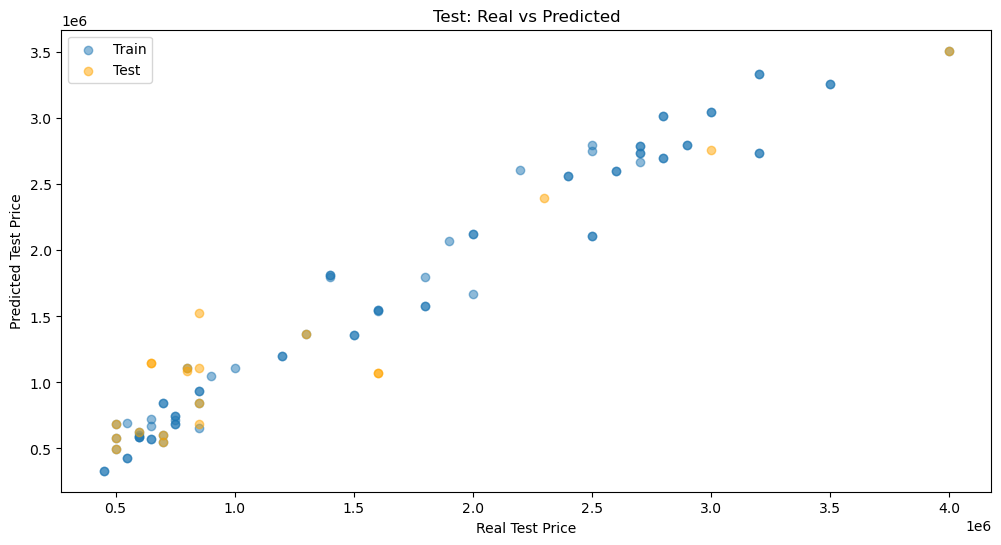

In [218]:
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)
display(coef_df)
train_test_results(model, X_train, y_train, X_test, y_test)

**Висновок:**
Ми навчили лінійну регресійну модель і перевірили її точність. Помилка на тренувальних даних вийшла значно меншою, ніж на тестових (189 903 проти 328 475), тому можна сказати, що модель запам’ятала навчальні дані і гірше працює на нових.

На графіку видно, що модель загалом правильно передбачає ціни: коли реальна ціна більша — передбачення теж більше. Але є деякі серйозні помилки, особливо для дуже дорогих машин — модель часто їх недооцінює.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

,Feature,Coefficient
4,Power,472288.946911
10,BMW,225655.975473
9,Audi,203634.964392
16,Mercedes,199458.260847
14,Mahindra,-158603.977333
7,Fuel_Type_Code,150490.449834
13,Hyundai,-115836.783394
19,Volkswagen,-111457.313872
8,Transmission_Code,110324.514200
11,Ford,-101455.367218


Train Loss: 189903.05
Test Loss: 328475.87


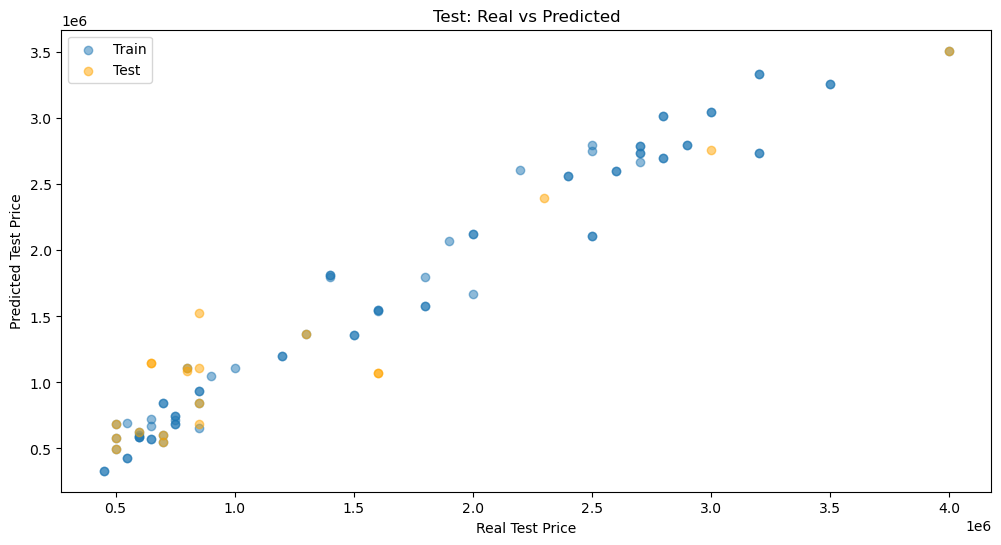

In [219]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
coefficients_scaled = scaled_model.coef_
coef_df_scaled = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_scaled
}).sort_values(by='Coefficient', key=abs, ascending=False)
display(coef_df_scaled)
train_test_results(scaled_model, X_train_scaled, y_train, X_test_scaled, y_test)

Найбільший вплив на ціну автомобіля мають такі ознаки після масштабування:
- `Power` - потужність двигуна
- найпопулярніші марки автомобілів дорогого сегменту, такі як `BMW`, `Audi`, `Mercedes`
- `Fuel_Type` - тип пального, яке використовується в автомобілі

До масштабування найбільший вплив мали лише марки автомобілів

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [236]:
X_train_sm = sm.add_constant(pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index))
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     60.31
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           3.01e-31
Time:                        15:34:45   Log-Likelihood:                -1085.9
No. Observations:                  80   AIC:                             2222.
Df Residuals:                      55   BIC:                             2281.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.673e+06   2.56e+0

In [237]:
summary_table = model_sm.summary2().tables[1]
significant_features = summary_table[summary_table['P>|t|'] < 0.05].index
significant_features = [feature for feature in significant_features if feature != 'const']

print("Статистично значущі ознаки (p < 0.05):")
print(significant_features)

Статистично значущі ознаки (p < 0.05):
['Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']


Статистично значущими є наступні ознаки:
- потужність двигуна
- тип пального
- тип коробки передач
- бренди преміального сегменту, такі як 'Audi', 'BMW', тощо

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [240]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_significant = X_train_scaled_df[significant_features]
X_train_significant_const = sm.add_constant(X_train_significant)
model_sm_significant = sm.OLS(y_train, X_train_significant_const).fit()
print(model_sm_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     105.7
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           6.59e-39
Time:                        15:43:16   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.672e+06   2.62e+0

Навіть піцсля видалення статистично незначущих ознак, якість моделі майже не змінилась:
- R2 знизився лише з 0.963 до 0.954 (менше 1%)
- Adj. R2 зменшився на лише 0.002
Видалені ознаки не давали істотного впливу на модель

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [241]:
significant_features_min = summary_table[summary_table['P>|t|'] < 0.025].index
significant_features_min = [feature for feature in significant_features_min if feature != 'const']

print("Статистично значущі ознаки (p < 0.025):")
print(significant_features_min)

Статистично значущі ознаки (p < 0.025):
['Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']


In [242]:
X_train_significant_min = X_train_scaled_df[significant_features_min]
X_train_significant_const_min = sm.add_constant(X_train_significant_min)
model_sm_significant_min = sm.OLS(y_train, X_train_significant_const_min).fit()
print(model_sm_significant_min.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     102.5
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           3.22e-38
Time:                        15:49:58   Log-Likelihood:                -1099.6
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      67   BIC:                             2256.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.672e+06   2.76e+0

З попередньої моделі залишили лише ті змінні, де p-value < 0.025 — тобто ознаки, які з дуже високою ймовірністю впливають на ціну авто. Це ще більше скоротило набір ознак — до найнадійніших:
- R2 зменшився зовсім трохи: з 0.954 до 0.948
- Adj. R2 знизився з 0.945 до 0.939
- F-statistic лишився високим, отже модель загалом значуща.

орочення моделі до лише найзначущіших ознак (p < 0.025) практично не знизило точність, але зробило модель більш надійною.